<a href="https://colab.research.google.com/github/Abhishek-Adari/Computer-Vision-Projects/blob/main/ALPR_LARGE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Using a larger Dataset for the ALPR process and more powerful gpu to get more confident scores and more precise results with minimal losses

Dataset Size: > 2000

YOLO model: v8m

OCR process: easyocr

tracking loss in real time

epcohs:75


In [ ]:
#installing ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 27.6 MB/s eta 0:00:00


In [ ]:
#initalizing the volo v8 model

model = YOLO('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:00<00:00, 108MB/s] 


In [ ]:
#uploading dataset

from google.colab import files
uploaded = files.upload()

Saving ALPR_4.zip to ALPR_4.zip


In [ ]:
#unzipping files
import zipfile
import os
zip_file = 'ALPR_4.zip'
extract_to = 'ALPR_4'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
#using tensorboard to run losses in runtime
# 1. Install TensorBoard
#!pip install -q tensorboard

# 2. Start TensorBoard to view logs
%its load_ext tensorboard
%tensorboard --logdir runs/train

UsageError: Line magic function `%its` not found.


In [ ]:
#training model on dataset
model = model.train(
    data = 'ALPR_4/data.yaml',
    epochs = 75,
    imgsz = 640,
    batch=16,
    verbose =True
)

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ALPR_4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

train: Scanning /content/ALPR_4/train/labels.cache... 2409 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2409/2409 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 420.5±67.0 MB/s, size: 38.0 KB)


val: Scanning /content/ALPR_4/valid/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      6.57G     0.6951     0.4882     0.8673         14        640: 100%|██████████| 151/151 [00:51<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        228        228       0.97      0.985      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75       6.6G     0.7305     0.5262     0.8765         11        640: 100%|██████████| 151/151 [00:50<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        228        228       0.96      0.974      0.981      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      6.67G     0.7878     0.5724     0.8914         15        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all        228        228      0.901      0.918      0.942      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      6.75G      0.773     0.5504     0.8919         19        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        228        228      0.981      0.956      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      6.78G     0.7361     0.5183     0.8816         16        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]

                   all        228        228      0.972      0.961      0.985      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      6.78G     0.7163     0.4999     0.8699         22        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]

                   all        228        228      0.969      0.969       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      6.78G     0.7005     0.4895     0.8718         13        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        228        228      0.967      0.974      0.988      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      6.85G     0.6802      0.465      0.865         16        640: 100%|██████████| 151/151 [00:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        228        228      0.977      0.982      0.991      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      6.85G     0.6729     0.4578     0.8603         18        640: 100%|██████████| 151/151 [00:49<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        228        228      0.982      0.968       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      6.89G     0.6555     0.4306     0.8611         12        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        228        228      0.985      0.978       0.99      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      6.92G     0.6368     0.4255     0.8563         16        640: 100%|██████████| 151/151 [00:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        228        228      0.961      0.976      0.982      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      6.92G     0.6469     0.4261     0.8552         10        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        228        228      0.953      0.965      0.984      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      6.92G     0.6426     0.4242     0.8547         21        640: 100%|██████████| 151/151 [00:48<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all        228        228      0.967      0.978       0.99      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      6.96G     0.6267     0.4256     0.8549         14        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        228        228      0.978      0.952      0.986      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      6.96G     0.6264     0.4182     0.8539         21        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

                   all        228        228      0.976      0.969       0.99      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      6.96G       0.61     0.4063     0.8509         23        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        228        228      0.981      0.978       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      6.96G     0.6071     0.4011      0.851         13        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        228        228      0.986      0.965      0.989      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      6.96G      0.599     0.3971     0.8475         13        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        228        228      0.971      0.982      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      7.21G     0.5854      0.388     0.8463         14        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        228        228      0.986      0.996      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      7.21G     0.5749     0.3752     0.8409         24        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        228        228      0.986      0.978      0.988      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      7.21G     0.5819     0.3776     0.8455         16        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        228        228      0.986      0.978       0.99       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      7.21G     0.5709     0.3768     0.8378         20        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        228        228      0.978      0.975      0.991      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      7.21G     0.5568      0.359     0.8356         17        640: 100%|██████████| 151/151 [00:47<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        228        228      0.987      0.987      0.991      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      7.21G     0.5555      0.356      0.834         22        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        228        228      0.972      0.991      0.991      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      7.21G     0.5593     0.3658     0.8391         11        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        228        228      0.973      0.987       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      7.21G     0.5513     0.3613     0.8359         14        640: 100%|██████████| 151/151 [00:49<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

                   all        228        228      0.985      0.982       0.99       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      7.21G     0.5497     0.3576     0.8356         14        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        228        228      0.983      0.985      0.991      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      7.21G     0.5442     0.3506     0.8295         20        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]

                   all        228        228      0.987      0.969       0.99      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      7.21G     0.5295     0.3416      0.831          9        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        228        228       0.97      0.989      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      7.21G      0.525      0.336     0.8343         14        640: 100%|██████████| 151/151 [00:47<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        228        228      0.988      0.969       0.99      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      7.21G     0.5256     0.3347     0.8335         12        640: 100%|██████████| 151/151 [00:47<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        228        228      0.982      0.996      0.991      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      7.21G      0.516     0.3345     0.8265         17        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        228        228      0.987      0.974      0.991      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      7.21G     0.5168     0.3345     0.8257         19        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]

                   all        228        228      0.985      0.982      0.992      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      7.21G     0.5034     0.3272     0.8264         14        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        228        228      0.987      0.987       0.99      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      7.21G     0.5108     0.3236     0.8261         14        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]

                   all        228        228      0.991      0.972       0.99      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      7.21G     0.5013     0.3217     0.8252         13        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        228        228      0.982      0.978      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      7.21G     0.4994     0.3174     0.8262         15        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        228        228      0.974      0.986       0.99        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      7.21G     0.4933     0.3173     0.8247         13        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        228        228      0.982      0.972      0.991       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      7.21G       0.49     0.3138     0.8237         17        640: 100%|██████████| 151/151 [00:47<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        228        228      0.991      0.975      0.991      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      7.21G     0.4776     0.3088     0.8236         14        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]


                   all        228        228      0.986      0.987      0.992      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      7.21G     0.4719     0.3039     0.8212         19        640: 100%|██████████| 151/151 [00:47<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all        228        228      0.978      0.991      0.991      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      7.21G     0.4693     0.3038     0.8214         17        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]

                   all        228        228      0.983      0.992      0.992      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      7.21G     0.4668     0.3008     0.8204         10        640: 100%|██████████| 151/151 [00:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all        228        228      0.987      0.995      0.991       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      7.21G     0.4659     0.2953     0.8163         17        640: 100%|██████████| 151/151 [00:49<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        228        228      0.981      0.996      0.991       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      7.21G     0.4627     0.2963     0.8177         18        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        228        228      0.973      0.996       0.99      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      7.21G     0.4568     0.2938     0.8186         12        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        228        228      0.978      0.991       0.99      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      7.21G     0.4501     0.2871     0.8196         16        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        228        228      0.987      0.991      0.991      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      7.21G     0.4441      0.285     0.8219         18        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        228        228      0.982      0.991      0.991      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      7.21G     0.4446     0.2819     0.8182         15        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all        228        228      0.978      0.991      0.991      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      7.21G     0.4391     0.2785     0.8169         12        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        228        228      0.978      0.996      0.989      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      7.21G     0.4432     0.2814     0.8163         16        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all        228        228      0.981      0.996       0.99      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      7.21G     0.4359     0.2772     0.8163         17        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        228        228      0.977      0.996      0.991      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      7.21G     0.4339     0.2792     0.8183         15        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        228        228      0.987      0.986      0.989      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      7.21G     0.4303     0.2752     0.8164         13        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        228        228      0.986      0.982      0.992      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      7.21G     0.4197     0.2689     0.8108         16        640: 100%|██████████| 151/151 [00:47<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        228        228      0.987      0.991      0.991      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      7.21G     0.4149      0.264     0.8115         16        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]

                   all        228        228       0.97      0.991      0.992        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      7.21G     0.4188     0.2684     0.8127         20        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        228        228      0.973      0.996       0.99      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      7.21G     0.4146     0.2599     0.8115         17        640: 100%|██████████| 151/151 [00:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        228        228      0.978      0.996       0.99      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      7.21G     0.4078     0.2539     0.8089         14        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all        228        228      0.986      0.987       0.99      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      7.21G     0.4015     0.2549     0.8094         14        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        228        228      0.978      0.991       0.99      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      7.21G      0.401     0.2524     0.8092         20        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        228        228      0.985      0.991      0.991        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      7.21G     0.3883     0.2502     0.8089         21        640: 100%|██████████| 151/151 [00:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        228        228      0.986      0.991      0.991      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      7.21G      0.388     0.2415     0.8051         18        640: 100%|██████████| 151/151 [00:48<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]

                   all        228        228      0.983      0.996      0.991      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      7.21G     0.3846     0.2461     0.8046         20        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        228        228      0.978      0.996       0.99        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      7.21G     0.3801     0.2371     0.8054         22        640: 100%|██████████| 151/151 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]

                   all        228        228      0.978      0.996      0.991      0.897


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      7.21G     0.3578     0.2303     0.7939          9        640: 100%|██████████| 151/151 [00:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        228        228      0.978      0.996      0.991      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      7.21G      0.358     0.2307     0.7944          8        640: 100%|██████████| 151/151 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        228        228      0.982      0.987       0.99      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      7.21G     0.3454     0.2218     0.7918          9        640: 100%|██████████| 151/151 [00:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        228        228      0.987      0.986      0.993      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      7.24G     0.3386     0.2188     0.7919          9        640: 100%|██████████| 151/151 [00:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        228        228      0.982      0.991      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      7.24G      0.336     0.2169     0.7894          9        640: 100%|██████████| 151/151 [00:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        228        228      0.987      0.987      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      7.26G     0.3323     0.2142     0.7921          9        640: 100%|██████████| 151/151 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        228        228      0.987      0.991      0.991      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      7.26G     0.3254     0.2087     0.7931          9        640: 100%|██████████| 151/151 [00:46<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all        228        228      0.982      0.991      0.991      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      7.26G     0.3207     0.2088     0.7882          9        640: 100%|██████████| 151/151 [00:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        228        228      0.986      0.991      0.991      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      7.26G     0.3163     0.2045     0.7877          9        640: 100%|██████████| 151/151 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        228        228      0.987      0.991      0.989      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      7.26G     0.3046     0.1991     0.7921          9        640: 100%|██████████| 151/151 [00:46<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]

                   all        228        228      0.986      0.991       0.99      0.901



75 epochs completed in 1.065 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        228        228      0.986      0.982      0.992      0.903
Speed: 0.6ms preprocess, 3.8ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
#saves weights on drive

from google.colab import drive
drive.mount('/content/drive')


# Save your model
!cp runs/detect/train3/weights/best.pt /content/drive/MyDrive/best.pt

cp: cannot stat 'runs/detect/train3/weights/best.pt': No such file or directory


In [ ]:
#drive.mount('/content/drive')
!cp runs/detect/train3/* /content/drive/MyDrive/runs/detect/train3

cp: target '/content/drive/MyDrive/runs/detect/train3' is not a directory


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car1.jpeg to car1.jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.55.jpeg to WhatsApp Image 2025-07-14 at 10.14.55.jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.58.jpeg to WhatsApp Image 2025-07-14 at 10.14.58.jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg to WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.59.jpeg to WhatsApp Image 2025-07-14 at 10.14.59.jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.00.jpeg to WhatsApp Image 2025-07-14 at 10.15.00.jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg to WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.01.jpeg to WhatsApp Image 2025-07-14 at 10.15.01.jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.02.jpeg to WhatsApp Image 2025-07-14 at 10.15.02.jpeg


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
#lost runtime, so i need to get the weights back and redefine model
from google.colab import drive
drive.mount('/content/drive')
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/best.pt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
image_list = [
    "WhatsApp Image 2025-07-14 at 10.14.55.jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.58.jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.00.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.02.jpeg"
]

# Run prediction on each image separately
for image_path in image_list:
    print(f"Running prediction on: {image_path}")
    results = model.predict(source=image_path, save=True, conf=0.25)

Running prediction on: WhatsApp Image 2025-07-14 at 10.14.55.jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.55.jpeg: 640x320 1 license-plates, 51.8ms
Speed: 11.7ms preprocess, 51.8ms inference, 380.0ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.58.jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.58.jpeg: 640x320 1 license-plates, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg: 640x480 3 license-platess, 39.6ms
Speed: 2.0ms preprocess, 39.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.59.jpeg

image 1/1 /content/WhatsApp Im

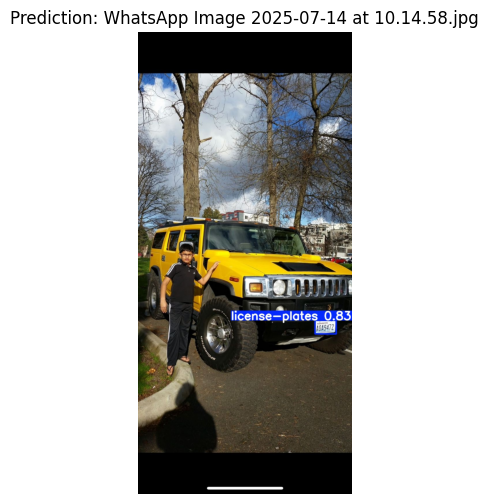

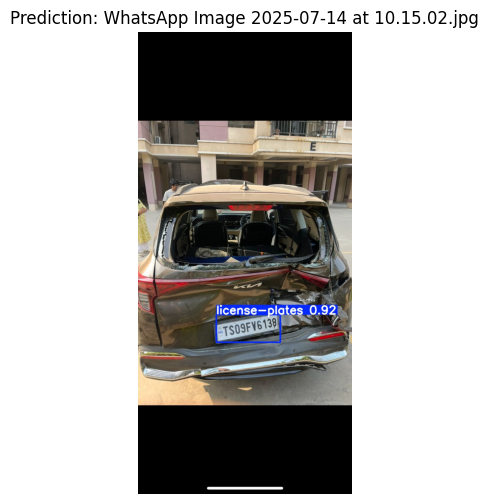

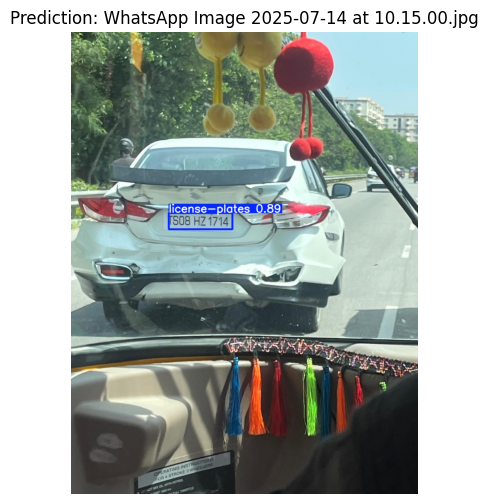

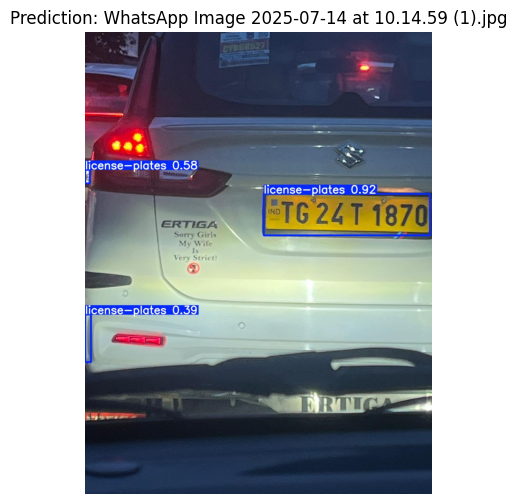

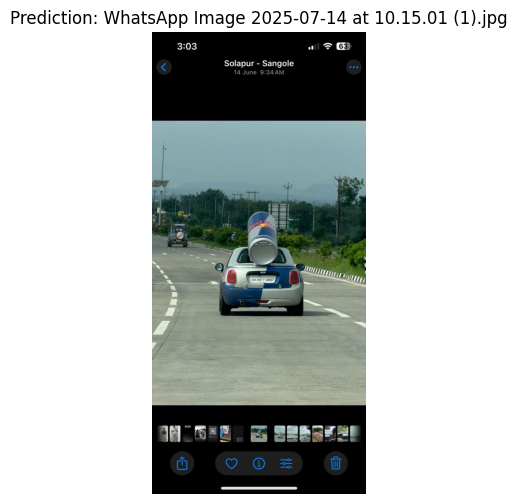

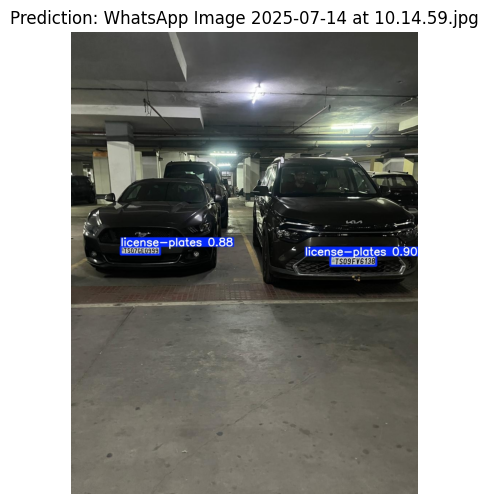

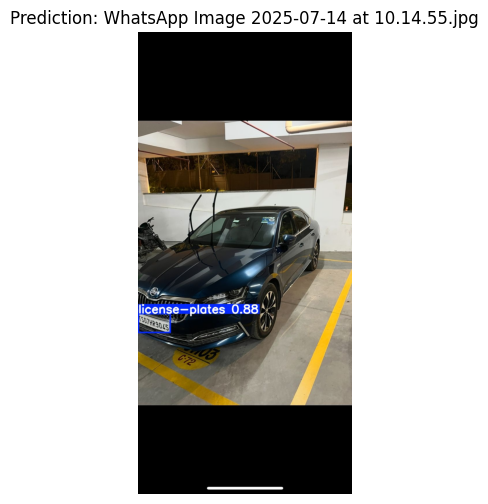

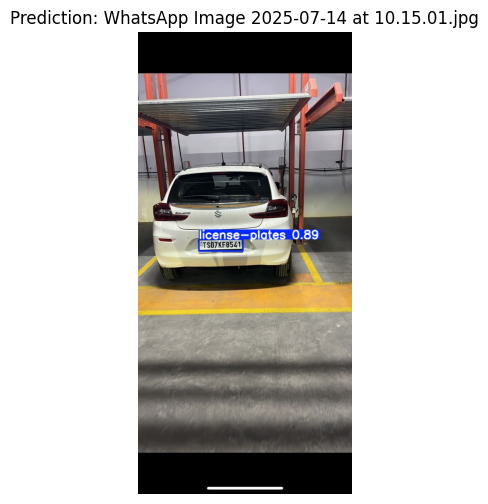

In [ ]:
#displaying predictions
import os
import cv2
import matplotlib.pyplot as plt

# Path to predicted images
pred_path = 'runs/detect/predict'

# List all image files
image_files = [f for f in os.listdir(pred_path) if f.endswith(('.jpg', '.png'))]

# Display images
for img_name in image_files:
    img_path = os.path.join(pred_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(f'Prediction: {img_name}')
    plt.axis('off')
    plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/results.ALPR_LARGE_DATASET.csv')
print(df.columns)  # to confirm what metrics are inside
df.head()

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   54.0396         0.69514         0.48824         0.86730   
1      2  107.3100         0.73047         0.52623         0.87653   
2      3  159.1990         0.78776         0.57244         0.89136   
3      4  210.2810         0.77300         0.55039         0.89195   
4      5  261.9110         0.73614         0.51831         0.88161   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.96978            0.98523           0.99076   
1               0.96044            0.97368           0.98051   
2               0.90102            0.91829           0.94154   
3               0.98117            0.95614           0.98439   
4               0.97168            0.96053           0.98509   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.82902       0.72165       0.44842       0.88605  0.000662   
1              0.80514       0.72916       0.60861       0.90117  0.001311   
2              0.74718       0.82178       0.79213       0.93284  0.001943   
3              0.81698       0.72388       0.51153       0.90059  0.001921   
4              0.82774       0.66982       0.47266       0.87452  0.001894   

     lr/pg1    lr/pg2  
0  0.000662  0.000662  
1  0.001311  0.001311  
2  0.001943  0.001943  
3  0.001921  0.001921  
4  0.001894  0.001894

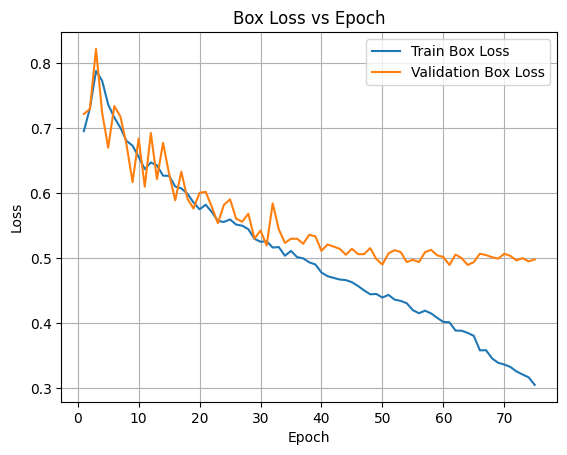

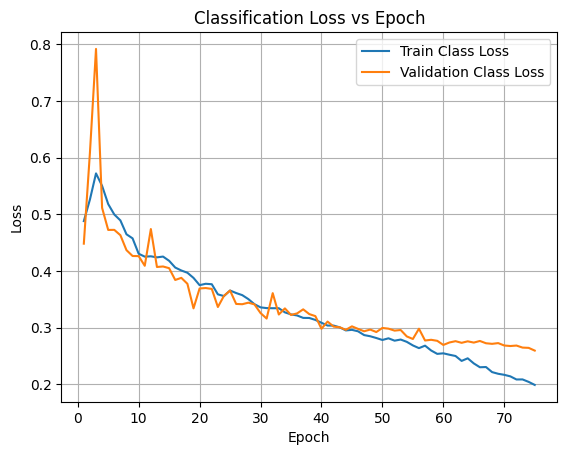

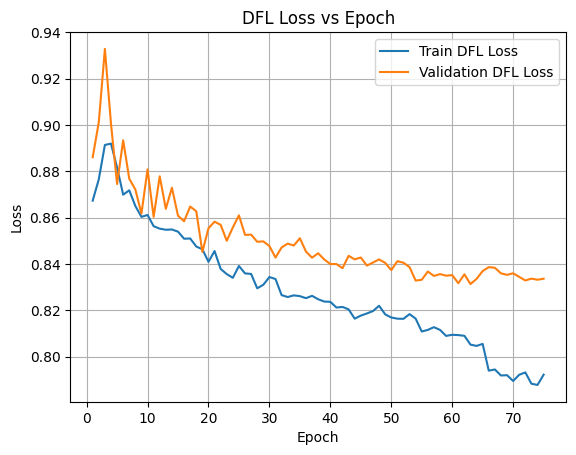

In [ ]:
# looking at losses
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file (adjust path if needed)
df = pd.read_csv('/content/drive/MyDrive/results.ALPR_LARGE_DATASET.csv')

# Plot box loss
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
plt.title('Box Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot classification loss
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss')
plt.title('Classification Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot DFL (Distribution Focal Loss)
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Validation DFL Loss')
plt.title('DFL Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

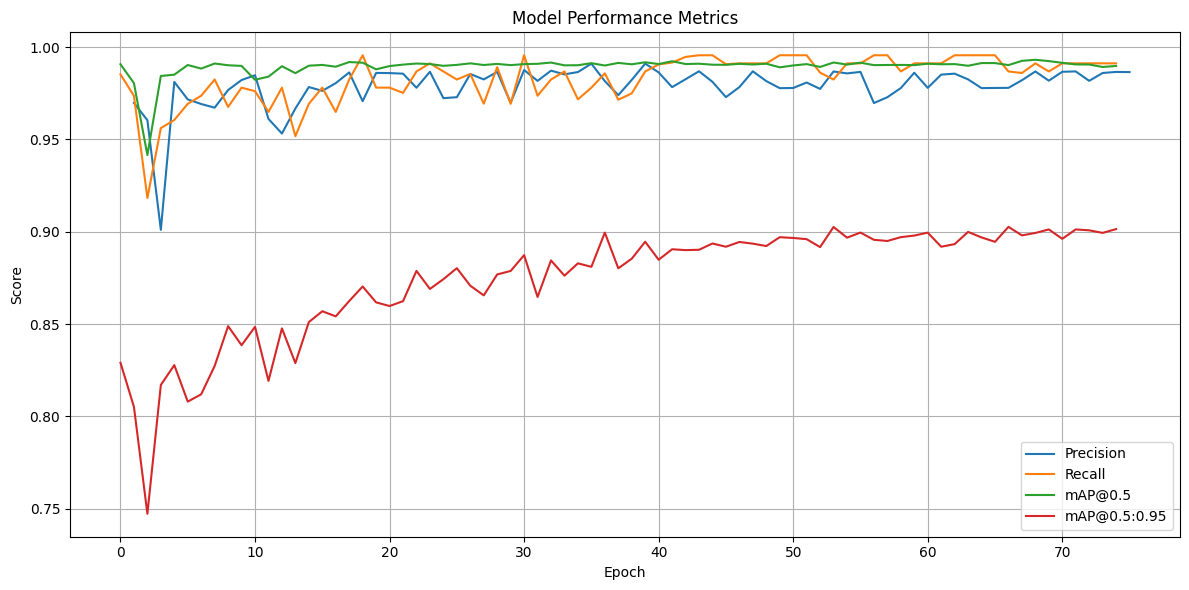

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the CSV
df = pd.read_csv('/content/drive/MyDrive/results.ALPR_LARGE_DATASET.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces in column names

# Plot key metrics
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns.tolist())

['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 25.7 MB/s eta 0:00:00


In [ ]:
import easyocr
import os
import cv2
import easyocr
import pandas as pd
from matplotlib import pyplot as plt

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

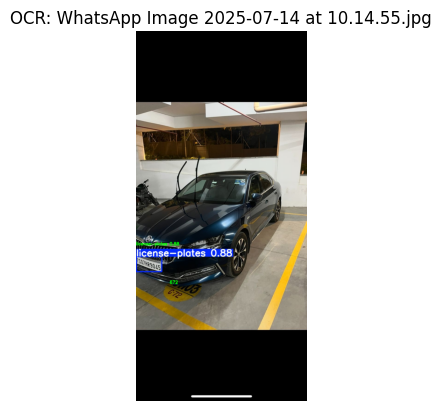

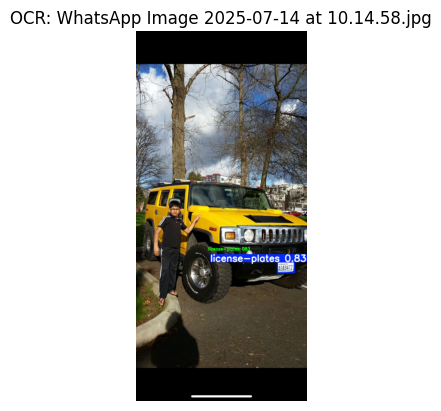

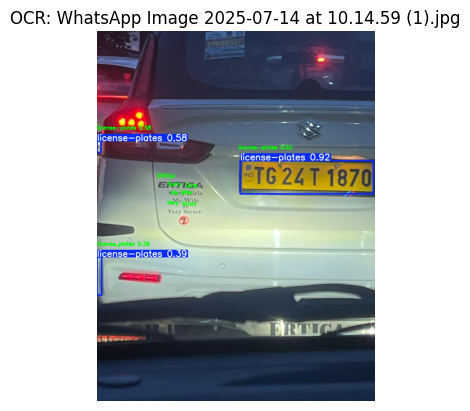

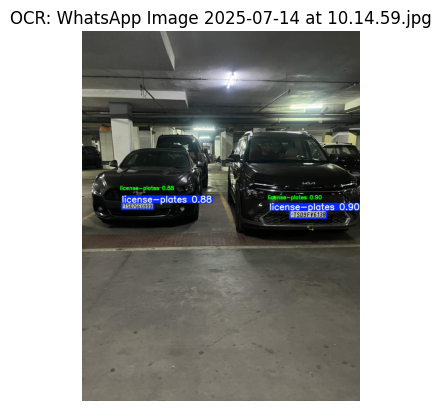

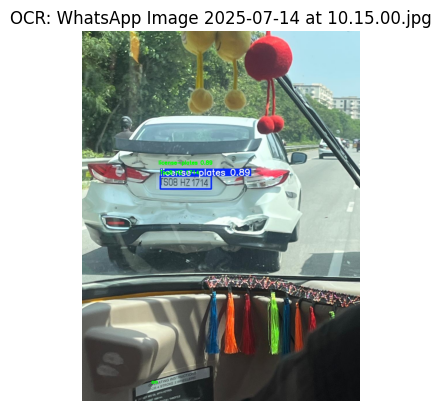

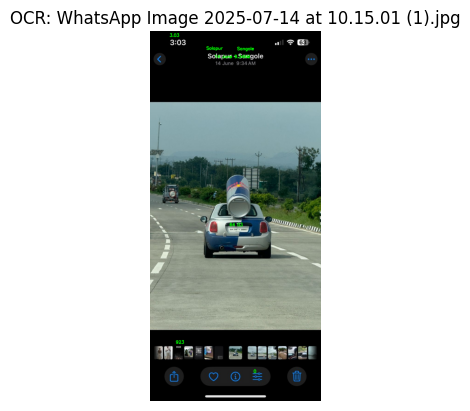

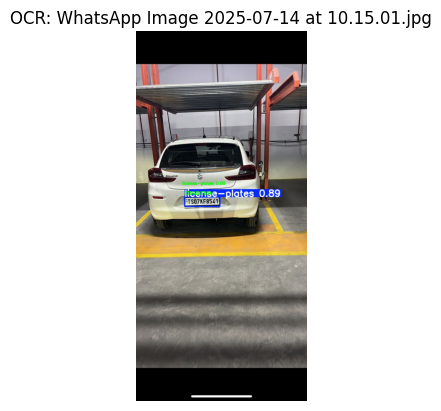

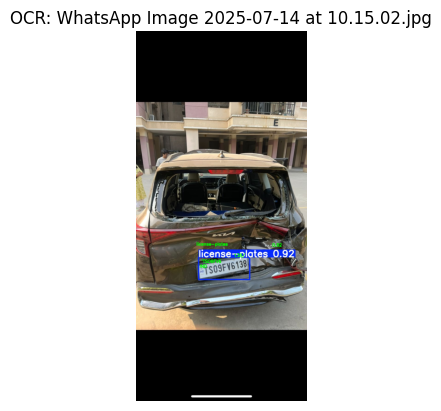

OCR results saved to: ocr_results.csv


In [ ]:


# 🔹 Folder where YOLOv8 predicted images are saved
PRED_DIR = 'runs/detect/predict'
OUTPUT_CSV = 'ocr_results.csv'

# 🔹 Initialize EasyOCR Reader (English)
reader = easyocr.Reader(['en'])

# 🔹 Create results list
results = []

# 🔹 Process each predicted image
for file_name in sorted(os.listdir(PRED_DIR)):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(PRED_DIR, file_name)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Skipping unreadable file: {img_path}")
            continue

        # Run OCR
        ocr_output = reader.readtext(image)

        # Display detections on image
        for (bbox, text, confidence) in ocr_output:
            if confidence > 0.3:  # Filter low-confidence predictions
                top_left = tuple([int(val) for val in bbox[0]])
                bottom_right = tuple([int(val) for val in bbox[2]])

                # Draw rectangle + text
                #cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
                cv2.putText(image, text, (top_left[0], top_left[1]-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

                # Save to results
                results.append({
                    'filename': file_name,
                    'text': text,
                    'confidence': confidence
                })

        # Show the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"OCR: {file_name}")
        plt.axis('off')
        plt.show()

# 🔹 Save OCR results to CSV
df = pd.DataFrame(results)
df.to_csv(OUTPUT_CSV, index=False)
print(f"OCR results saved to: {OUTPUT_CSV}")


🔍 Processing: WhatsApp Image 2025-07-14 at 10.14.55.jpeg

0: 640x320 1 license-plates, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 320)
📦 Number of detections: 1


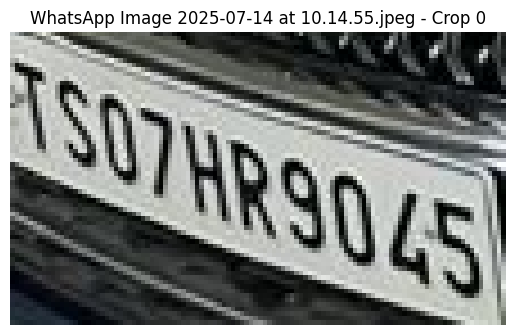

  🔤 Text: IsozHR90L5) | 🔍 Confidence: 0.31

🔍 Processing: WhatsApp Image 2025-07-14 at 10.14.58.jpeg

0: 640x320 1 license-plates, 11.4ms
Speed: 4.8ms preprocess, 11.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 320)
📦 Number of detections: 1


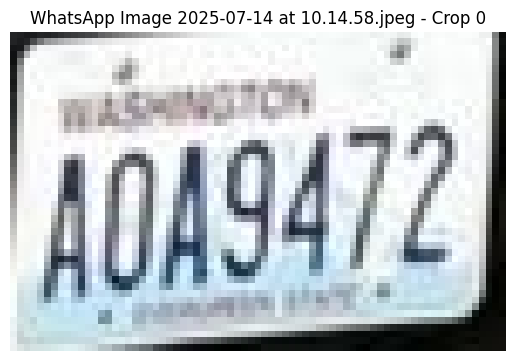

  🔤 Text: h0a9472 | 🔍 Confidence: 0.40

🔍 Processing: WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg

0: 640x480 3 license-platess, 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
📦 Number of detections: 3


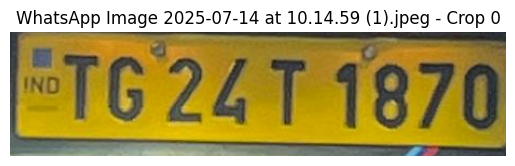

  🔤 Text: @TG 2Lt 1870 | 🔍 Confidence: 0.19


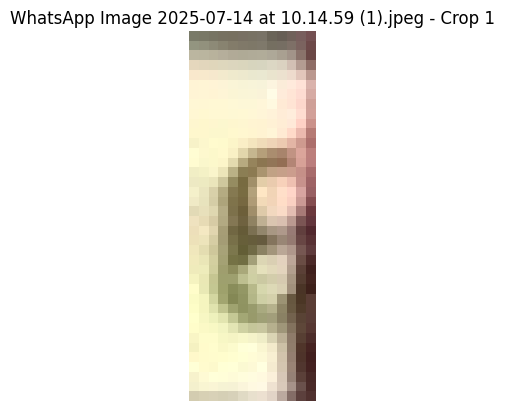

  ❌ No text detected by OCR.


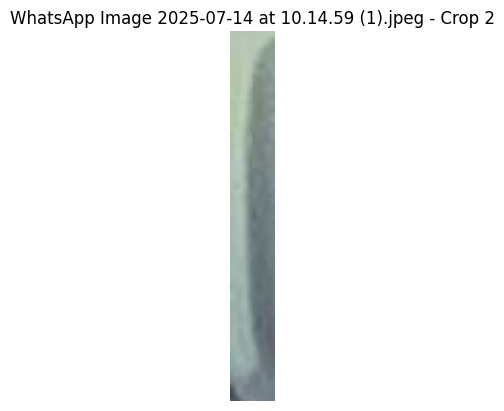

  ❌ No text detected by OCR.

🔍 Processing: WhatsApp Image 2025-07-14 at 10.14.59.jpeg

0: 640x480 2 license-platess, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
📦 Number of detections: 2


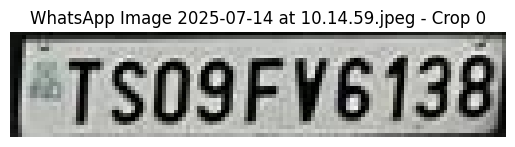

  🔤 Text: TSO9FV6138 | 🔍 Confidence: 0.79


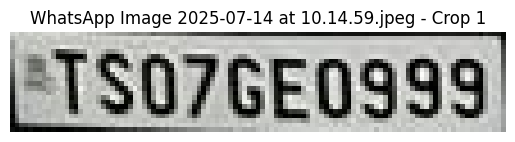

  🔤 Text: ISOZGE0999 | 🔍 Confidence: 0.81

🔍 Processing: WhatsApp Image 2025-07-14 at 10.15.00.jpeg

0: 640x480 1 license-plates, 14.4ms
Speed: 2.6ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
📦 Number of detections: 1


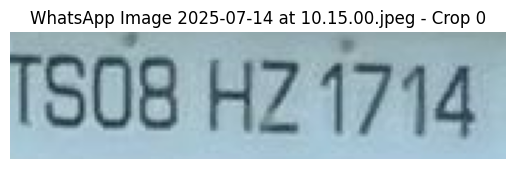

  🔤 Text: TSO8 HZ 1714 | 🔍 Confidence: 0.47

🔍 Processing: WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg

0: 640x320 (no detections), 11.1ms
Speed: 3.7ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 320)
📦 Number of detections: 0

🔍 Processing: WhatsApp Image 2025-07-14 at 10.15.01.jpeg

0: 640x320 1 license-plates, 10.2ms
Speed: 3.8ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 320)
📦 Number of detections: 1


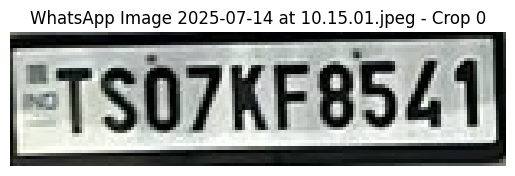

  🔤 Text: PTSO7KF8541 | 🔍 Confidence: 0.52

🔍 Processing: WhatsApp Image 2025-07-14 at 10.15.02.jpeg

0: 640x320 1 license-plates, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 320)
📦 Number of detections: 1


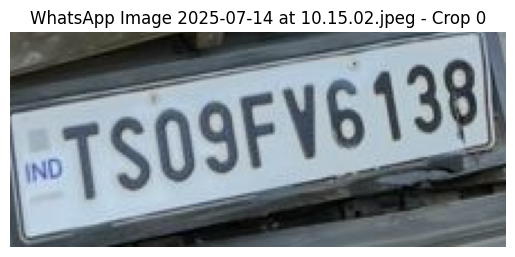

  🔤 Text: IND | 🔍 Confidence: 0.96
  🔤 Text: 138/ | 🔍 Confidence: 0.84
  🔤 Text: 'TSO9FV6  | 🔍 Confidence: 0.58


In [ ]:
import cv2
import matplotlib.pyplot as plt
import easyocr
from ultralytics import YOLO

# Load model and OCR reader only once (outside the loop)
reader = easyocr.Reader(['en'])

# List of images
image_list = [
    "WhatsApp Image 2025-07-14 at 10.14.55.jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.58.jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.00.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.02.jpeg"
]

# Loop through each image
for image_path in image_list:
    print(f"\n🔍 Processing: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        print("⚠️ Image not found or unreadable.")
        continue

    results = model(image)
    boxes = results[0].boxes.xyxy.cpu().numpy()

    print(f"📦 Number of detections: {len(boxes)}")

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        plate_crop = image[y1:y2, x1:x2]

        # Display cropped plate
        plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
        plt.title(f"{image_path} - Crop {i}")
        plt.axis('off')
        plt.show()

        # Run OCR on the cropped plate
        result = reader.readtext(plate_crop)

        if result:
            for detection in result:
                text, confidence = detection[1], detection[2]
                print(f"  🔤 Text: {text} | 🔍 Confidence: {confidence:.2f}")
        else:
            print("  ❌ No text detected by OCR.")

In [ ]:
print(f"Number of detections: {len(results[0].boxes)}")

Number of detections: 1


In [ ]:
!pip install transformers torchvision

FINAL VEREDICT:

Losses indicate that the model is overfitting(can fix with more involvement with dataset...)


